In [12]:
# Hausi's email: hausimuller@gmail.com
# Quantum Composer: quantum.cloud.ibm.com/composer

# notebook imports
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
import os

# load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

# load Qiskit API token from .env file
QISKIT_API_TOKEN = os.getenv("QISKIT_API_TOKEN")
QiskitRuntimeService.save_account(token=QISKIT_API_TOKEN, overwrite=True)

The goal of this Term Portfolio Project (TPP) is to document your learning journey into the realm of Quantum Computing by developing a Jupyter Notebook Portfolio.

First and foremost, this document is for you to reflect regularly on your learning journey. Secondly, it is intended for your instructors and teaching assistants to gauge your progress in understanding the topics being discussed in this course.

The Portfolio Term Project should be developed incrementally &mdash; with weekly contributions. The TPP consists of two parts. The first part should be approximately 5-7 pages (i.e., printing Jupyter Notebook as PDF pages).  The second part must include the first part at the beginning of the document -- that is, simply extend the Part 1 Jupyter Notebook to develop the second part. Thus, the final Jupyter Notebook that includes both parts should be approximately 18-20 pages.

For Part 1, you are to document the following aspects of your Quantum computing journey, and also your experience learning the functionality and use of Jupyter Notebooks. Here are some questions you can answer for Part 1 of your TPP.


1. How did you get up to speed in basic linear algebra (e.g., Euler formula, complex plane,  linear transformations or operators, eigenvectors and eigenvalues), including which resources you consulted in this process?

> As I am early(ish) into my degree program, I took linear algebra not too long ago (2 years prior to this course). I also took PHYS223 two semesters ago, which served as a good introduction to the physics (and maths) behind QIS, and further solidified my linear algebra skills. For these reasons it took less time to get back "up to speed". 

> The resources I consulted consisted of the PHYS223 textbook, and the videos recommended by Dr. Muller.

2. How did you get started in documenting linear algebra formulas (e.g., Euler formula or matrices) using LaTeX Markdown in Jupyter Notebooks?  Develop your own cheat sheet of the quantum computing formulas and Dirac notation to ease assignment typesetting.

3. How did you get started running your first quantum circuits using IBM Qiskit and Xanadu Pennylane Jupyter Notebook platforms?

4. How would you motivate other students to join the journey into quantum computing given the motivational materials presented in class and found in the references? Your answers to this question will likely evolve during this course. Revisit regularly this quesion.

5. Which algorithm is your favourite quantum algorithm so far?

6. What was the most challenging part in understanding Grover's algorithm?
7. (Required) What are your personal insights, aha moments, and epiphanies you experienced in the first part of this course?
8. (Required) How did you experience Generative AI as a learning tool for this course?
Record your Generative AI prompts and contexts for Basic Quantum Terms, Complex Linear Algebra, Quantum Algorithms, Python, Qiskit, and PennyLane inquiries for easy recall. Use the same line item or project in your genAI engine (e.g., ChatGPT, Google Gemini, Perplexity, or others) to build up the "quantum context".

Citations and references. The contents of your notebook portfolio project must be your own work. If you reference the work of others (including information found on the web or using genAI tools), include full citations in a bibliography at the end of your document.

# Week 2 (Lecture 3-4)
Introduction to 1-qubit systems.

Recall Euler's Identity: 

$$
e^{i\pi{}} + 1 = 0
$$

Which in the general case is Euler's Formula: 

$$
e^{i\theta} = \cos{\theta} + i \sin{\theta}
$$

## Classical vs. Quantum Computing

Quantum computing is a completely different model of quantum computing. 

A key difference is that qubits can be in *superposition*- that is, data can exist on a spectrum anywhere from $\ket{0}$ to $\ket{1}$. 

It is based on linear algebra, rather than boolean algebra in the classical realm. States may be ambiguous, due to entanglement and importantly, interference. 

> Inteference can be mitigated by running a circuit many times, and sampling (to identify error).

Processing is done in parallel (rather than sequentially in classical space), using probabilistic quantum gates (rather than deterministic gates). 


## Basic Gates

$\ket{\phi}$ Gate: Initializes qubit to a given state, described by $\phi$.
> Note that this gate is not physically realizable on real quantum hardware, but is useful for simulation.



Hadamard (H) Gate: Puts a qubit into superposition. Note the definition of Hadamard at [IBM Quantum Learning](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.library.HGate)

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

*Note:* The Hadamard gate is a LINEAR operator. Therefore we can take advantage of the properties of linearity, which is especially useful when dealing with states in superposition. 

CNOT: Depending on the value of the control-bit, this will perform a NOT operation (Pauli-X matrix) on the target qubit. 

Measurement: Collapses the qubit and measures it, and outputs to a classical bit. 


## Matrix Notation
Dirac notation is a way of doing "short-hand" for large vectors. This simplifies working with matrices. 

## Bra-Ket Notation
[Bra-Ket notation](https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation) is the standard way of communicating Quantum Information. 

### Computational Basis
In quantum mechanics, $\ket{0}$ and $\ket{1}$ are the fundamental, orthogonal states of a qubit, analogous to $0$ and $1$ of a classical bit. 

They form the building blocks for any more complex quantum state. 

$$
\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad
\ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

## So what is a Bra and a Ket? 
A "Ket" $\ket{\psi}$ is a column vector, representing a quantum state. A "Bra" $\bra{\psi}$ is the conjugate transpose of a Ket, represented as a row vector.

The Ket captures all information about a quantum state, while the Bra is used in operations like inner products and outer products.

### Conjugate Transpose
The conjugate transpose (or Hermitian transpose, notated by $\dagger$) of a matrix is obtained by taking the transpose of the matrix and then taking the complex conjugate of each element &mdash; that is, changing the sign of the imaginary part.

> To do this, replace every complex number in the vector with it's complex conjugate (i.e., change the sign of the imaginary part), then transpose the vector (i.e., convert rows to columns and vice versa).

$$
\text{If } \ket{\psi} = \begin{bmatrix} a +
ib \\ c + id \end{bmatrix}, \text{ then } \bra{\psi} = \begin{bmatrix} a - ib & c - id \end{bmatrix}
$$

Alternatively, using conjugate-star notation:

## Inner Product
The inner product (or dot product) of two quantum states $\ket{\phi}$ and $\ket{\psi}$ is denoted as $\langle \phi | \psi \rangle$.

It is calculated like a dot product, and results in a scalar. 

> These products are often referred to as expectation values. 

### Applications
The inner product can be interpreted in many ways in Quantum Mechanics: 

- Quantum Overlap: Measures the similarilty (or overlap)

(review slide 24, L03)

## Outer Product
The reverse order produces a matrix (often used as an operator): 

$$
\bra{\phi}\ket{\psi} = \begin{bmatrix} \phi{}_1 \\ \phi{}_2 \end{bmatrix} \begin{bmatrix} \psi{}_1^{*} & \psi{}_2 \end{bmatrix}

$$

### Applications

(Review L03, slide 25)

## Superposition

Unlike classical bits, a qubit can exist in a superposition of $\ket{0}$ and $\ket{1}$, simultaneously. This is a probablilistic combination of all possible states until measured. (Think a linear combination of states.)

$$

\ket{\psi} = \alpha{} \ket{0} + \beta{}\ket{1} \qquad{} \alpha{}, \beta{} \in{} \mathbb{C}

$$

Note that $\alpha{}$ and $\beta{}$ are **complex amplitudes**, and are NOT probabilities. 

Superposition is the physical interpretation of a linear combination. 

- The qubit is not in state $\ket{0}$ or in state $\ket{1}$. 
- It instead exists in a **coherent combination** of both basis states. 
- Interference between amplitudes is possible (this enables many quantum algorithms to amplify correct answers)

> Superposition enables quantum parallelism and interference, but is not inherently randomness. 

## Born Rule
The Born rule connects the quantum state to measurement outcomes: 

$$ 
P(0) = |\alpha|^2, \qquad P(1) = |\beta|^2
$$

- Measurement collapses the state to a basis state
- Probabilites come from squared magnitudes.
- It is important to ensure probabilites sum to 1. 

We often want $ |\alpha|^2 + |\beta|^2 = 1$.
> This is why superpositions often have square-rooted magnitudes. 







# Lecture 4 - Quantum Gates

Quantum Gates are the building blocks of a quantum circuit. They are the fundamental operators that enable circuits to do useful work. They are unitary operations, which are inherently reversible. 

Reversibility is unusual (coming from classical computing), as some gates, such as NAND are irreversible in the classical realm.

This means, for any arbitrary gate $A$: 

$$
A A^{-1} \ket{\phi} = \ket{\phi}
$$


Gates can have many inputs, spanning multiple qubits. (e.g. CNOT)

Keep in mind that gates lead to the decoherence of quantum states. This means that gates introduce interference, and therefore large circuits with many gates can be unreliable. 




/opt/homebrew/anaconda3/envs/qiskit-jupyter/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:272: UserWarning: Style JSON file 'default.json' not found in any of these locations: /opt/homebrew/anaconda3/envs/qiskit-jupyter/lib/python3.11/site-packages/qiskit/visualization/circuit/styles/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


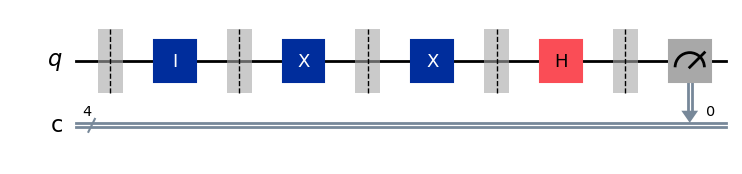

In [14]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.barrier(qreg_q[0])
circuit.id(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw(output='mpl', style='default')

Let's talk about gates, and what they do. 

## Identity matrix (I-Gate)
This applies the identity matrix to the state, appling the operation $I\ket{\psi}$ for some arbitrary state. 

## NOT Gate (Pauli-X Gate)
This applies the Pauli-X matrix to the state, inverting it's state. 

$$ 

X = \begin{bmatrix} 0 & 1 \\1 & 0 \end{bmatrix}

$$ 

## Key Definitions

- Gate Time Definition: Time required to apply a single quantum gate operation

- Optimization Balance: Balance operational speed against error rates and decoherence. 

- Decoherence Risk: 

- Control Precision: 

- Reliable Outcomes: 


# Unitary Operations

Unitary operations are incredibly important to quantum computing. Each operator is reversible.


For any unitary matrix $U$: 

$$ 
UU^{\dagger} = I
$$

- We observe the conservation of probability (that is the total probability remains exactly 1),
- We observe that all unitary operations (hence all quantum operations) can be undone. 

To check if a matrix is unitary, verify that matrix multiplicaiton with it's complex conjugate yields the identity matrix. 

> Note that matrices are linear operators. Therefore all properties of linearity apply. 

## Why are matrices called operators? 
Matrices act on vectors to produce new vectors - acting exactly like functions that transform inputs to outputs. 

We can apply these operations sequentially, as defined already in matrix arithmetic. 

Using matrices as operators unlocks eigenvalue analysis, diagonalization and spectral theory - tools for solving complex problems. 

